In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# SciPy

The SciPy framework builds on top of the low-level NumPy framwork for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing the `scipy` module. As a shortcut, we will abbreviate `scipy` to `sp`, analogous to what we have done with NumPy.

In [2]:
import scipy as sp

## Integration

### Numerical integration: quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [3]:
from scipy.integrate import quad, dblquad, tplquad

The `quad` functions takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function.

In [4]:
help(quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : function
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
        If the user desires improved integration performance, then f may
        instead be a ``ctypes`` function of the form:
    
            f(int n, double args[n]),
    
        where ``args`` is an array of function arguments and ``n`` is the
        length of ``args``. ``f.argtypes`` should be set to
        ``(c_int, c_double)``, and ``f.restype`` should be ``(c_double,)``.
    a : float
     

Here is a simple usage example:

In [5]:
# define a simple function for the integrand
def f(x):
    return x

In [6]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print("integral value = {0}, absolute error = {1}".format(val, abserr))

integral value = 0.5, absolute error = 5.551115123125783e-15


If we need to pass extra arguments to integrand function we can use the `args` keyword argument:

In [7]:
from scipy import stats
import numpy as np

In [8]:
# Integral of N(2, 3) over [inf, 0)
val, abserr = quad(stats.distributions.norm.pdf, a=-np.inf, b=0, 
                   args=(2, 3))

print(val, abserr)

0.2524925375469229 8.193093413455012e-10


In [9]:
stats.distributions.norm.cdf(0, 2, 3)

0.25249253754692291

As show in the example above, we can also use 'Inf' or '-Inf' as integral limits.

Higher-dimensional integration works in the same way:

In [10]:
dblquad?

In [11]:
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, 
                      lambda x : y_lower, lambda x: y_upper)

print(val, abserr) 

0.7853981633974476 1.638229942140971e-13


Note how we had to pass `lambda` functions for the limits for the y integration, since these in general can be functions of x.

### Example: Trapezoid rule

A simple illustration of the trapezoid rule for definite integration:

$$
\int_{a}^{b} f(x)\, dx \approx \frac{1}{2} \sum_{k=1}^{N} \left( x_{k} - x_{k-1} \right) \left( f(x_{k}) + f(x_{k-1}) \right).
$$
<br>
First, we define a simple function and sample it between 0 and 10 at 200 points

In [12]:
def f(x):
    return (x-3)*(x-5)*(x-7)+85

x = np.linspace(0, 10, 200)
y = f(x)

Choose a region to integrate over and take only a few points in that region

In [13]:
a, b = 1, 11
xint = x[np.logical_and(x>=a, x<=b)][::30]
yint = y[np.logical_and(x>=a, x<=b)][::30]

Plot both the function and the area below it in the trapezoid approximation

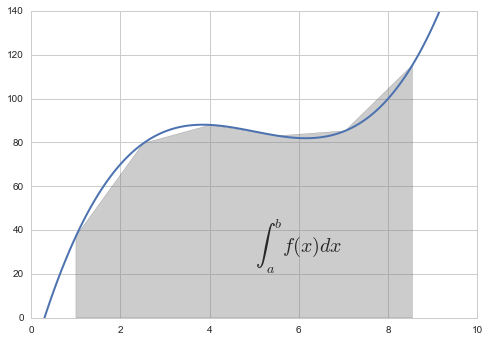

In [14]:
%matplotlib inline
import pylab as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.plot(x, y, lw=2)
plt.axis([0, 10, 0, 140])
plt.fill_between(xint, 0, yint, facecolor='gray', alpha=0.4)
plt.text(0.5 * (a + b), 30,r"$\int_a^b f(x)dx$", 
         horizontalalignment='center', fontsize=20)

In [15]:
from scipy.integrate import quad, trapz
integral, error = quad(f, 1, 9)
print("The integral is:", integral, "+/-", error)
print("The trapezoid approximation with", len(xint), "points is:", trapz(yint, xint))

The integral is: 680.0 +/- 7.549516567451064e-12
The trapezoid approximation with 6 points is: 621.286411141


## Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), and several decompositions. 

#### Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:

In [16]:
from numpy.linalg import solve, eigvals, eig, norm, inv, det

In [17]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([1,2,3])

In [18]:
x = solve(A, b)
x

array([-0.33333333,  0.66666667, -0.        ])

We can check this:

In [19]:
(np.dot(A, x) - b).round(10)

array([-0.,  0.,  0.])

We can also do the same with matrices:

In [20]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [21]:
X = solve(A, B)

In [22]:
X

array([[ 0.21623201,  1.30468415,  0.63519637],
       [-0.44637426, -0.66869378, -0.27335933],
       [ 0.7737017 ,  0.06138308,  0.31852076]])

In [23]:
# check
norm(np.dot(A, X) - B).round(10)

0.0

#### Eigenvalues and eigenvectors

The eigenvalue problem for a matrix $A$:

$\displaystyle A v_n = \lambda_n v_n$

where $v_n$ are is the $n$th eigenvector and $\lambda_n$ is the $n$th eigenvalue.

To calculate eigenvalues of a matrix, use the `eigvals` and for calculating both eigenvalues and eigenvectors, use the function `eig`:

In [24]:
evals = eigvals(A)

In [25]:
evals

array([ 2.00838333+0.j        ,  0.27745347+0.10415438j,
        0.27745347-0.10415438j])

In [26]:
evals, evecs = eig(A)

In [27]:
evals

array([ 2.00838333+0.j        ,  0.27745347+0.10415438j,
        0.27745347-0.10415438j])

In [28]:
evecs

array([[ 0.65051461+0.j        ,  0.79807163+0.j        ,  0.79807163-0.j        ],
       [ 0.58811509+0.j        , -0.50603294+0.15671098j,
        -0.50603294-0.15671098j],
       [ 0.48057401+0.j        , -0.19317798-0.21245299j,
        -0.19317798+0.21245299j]])

The eigenvectors corresponding to the $n$th eigenvalue (stored in `evals[n]`) is the $n$th *column* in `evecs`, i.e., `evecs[:,n]`. To verify this, let's try mutiplying eigenvectors with the matrix and compare to the product of the eigenvector and the eigenvalue:

In [29]:
n = 1

norm(np.dot(A, evecs[:,n]) - evals[n] * evecs[:,n]).round(10)

0.0

There are also more specialized eigensolvers, like the `eigh` for Hermitian matrices. 

#### Matrix operations

In [30]:
# the matrix inverse
np.linalg.inv(A)

array([[ 1.71126094, -3.10855873,  2.16176837],
       [-0.40353061,  3.21726554, -2.78165225],
       [-0.78963529, -0.2620385 ,  1.8874556 ]])

In [31]:
# determinant
np.linalg.det(A)

0.17639342301012281

In [32]:
# norms of various orders
np.linalg.norm(A, ord=2), np.linalg.norm(A, ord=np.inf)

(2.0235582490206463, 2.1760408500658741)

## Sparse matrices

Sparse matrices are often useful in numerical simulations dealing with large systems, if the problem can be described in matrix form where the matrices or vectors mostly contains zeros. Scipy has a good support for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc).

There are many possible strategies for storing sparse matrices in an efficient way. Some of the most common are the so-called coordinate form (COO), list of list (LIL) form,  and compressed-sparse column CSC (and row, CSR). Each format has some advantanges and disadvantages. Most computational algorithms (equation solving, matrix-matrix multiplication, etc) can be efficiently implemented using CSR or CSC formats, but they are not so intuitive and not so easy to initialize. So often a sparse matrix is initially created in COO or LIL format (where we can efficiently add elements to the sparse matrix data), and then converted to CSC or CSR before used in real calcalations.

When we create a sparse matrix we have to choose which format it should be stored in. For example, 

In [33]:
from scipy.sparse import csr_matrix, lil_matrix, csc_matrix

In [34]:
# dense matrix
M = np.array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [35]:
# convert from dense to sparse
A = csr_matrix(M); A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [36]:
# convert from sparse to dense
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]], dtype=int64)

More efficient way to create sparse matrices: create an empty matrix and populate with using matrix indexing (avoids creating a potentially large dense matrix)

In [37]:
A = lil_matrix((4,4)) # empty 4x4 sparse matrix
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [38]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

Converting between different sparse matrix formats:

In [39]:
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [40]:
A = csr_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [41]:
A = csc_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

We can compute with sparse matrices like with dense matrices:

In [42]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [43]:
(A * A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [44]:
A.dot(A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [45]:
v = np.array([1,2,3,4])[:,np.newaxis]
v

array([[1],
       [2],
       [3],
       [4]])

In [46]:
# sparse matrix - dense vector multiplication
A * v

array([[ 1.],
       [ 6.],
       [ 5.],
       [ 5.]])

In [47]:
# same result with dense matrix - dense vector multiplcation
A.todense() * v

matrix([[ 1.],
        [ 6.],
        [ 5.],
        [ 5.]])

## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases.

In [48]:
from scipy import optimize

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

In [49]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

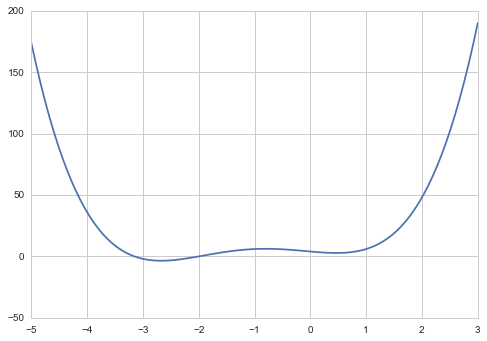

In [50]:
fig, ax = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

We can use the `fmin_bfgs` function to find the minima of a function:

In [51]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 6
         Function evaluations: 30
         Gradient evaluations: 10


array([-2.67298167])

In [52]:
optimize.fmin_bfgs(f, 0.5) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([ 0.46961745])

We can also use the `brent` or `fminbound` functions. They have a bit different syntax and use different algorithms. 

In [53]:
optimize.brent(f)

0.46961743402759754

In [54]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Finding a solution to a function

To find the root for a function of the form $f(x) = 0$ we can use the `fsolve` function. It requires an initial guess: 

In [55]:
omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return np.tan(2*np.pi*omega) - omega_c/omega

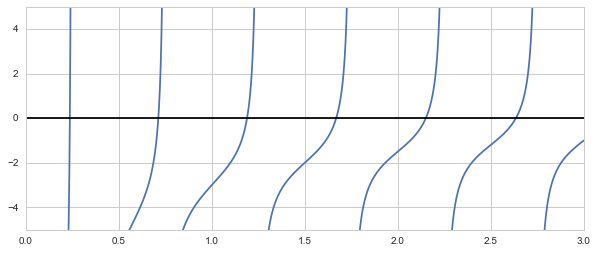

In [56]:
fig, ax = plt.subplots(figsize=(10,4))
x = np.linspace(0, 3, 1000)
y = f(x)
mask = np.where(abs(y) > 50)
x[mask] = y[mask] = None # get rid of vertical line when the function flip sign
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [57]:
optimize.fsolve(f, 0.1)

array([ 0.23743014])

In [58]:
optimize.fsolve(f, 0.6)

array([ 0.71286972])

In [59]:
optimize.fsolve(f, 1.1)

array([ 1.18990285])

### Example: truncated distribution

Suppose that we observe $Y$ truncated below at $a$ (where $a$ is known). If $X$ is the distribution of our observation, then:

$$ P(X \le x) = P(Y \le x|Y \gt a) = \frac{P(a \lt Y \le x)}{P(Y \gt a)}$$

(so, $Y$ is the original variable and $X$ is the truncated variable) 

Then X has the density:

$$f_X(x) = \frac{f_Y (x)}{1−F_Y (a)} \, \text{for} \, x \gt a$$ 

Suppose $Y \sim N(\mu, \sigma^2)$ and $x_1,\ldots,x_n$ are independent observations of $X$. We can use maximum likelihood to find $\mu$ and $\sigma$. 

First, we can simulate a truncated distribution using a `while` statement to eliminate samples that are outside the support of the truncated distribution.

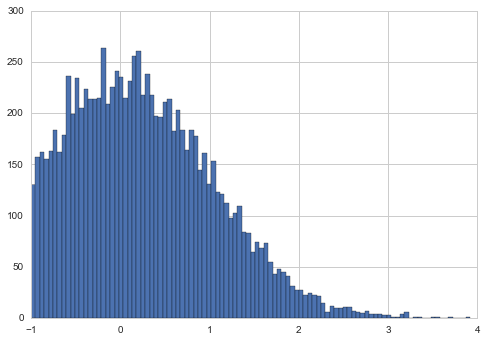

In [60]:
x = np.random.normal(size=10000)
a = -1
x_small = x < a
while x_small.sum():
    x[x_small] = np.random.normal(size=x_small.sum())
    x_small = x < a
    
_ = plt.hist(x, bins=100)

We can construct a log likelihood for this function using the conditional form:

$$f_X(x) = \frac{f_Y (x)}{1−F_Y (a)} \, \text{for} \, x \gt a$$ 

In [61]:
from scipy.stats.distributions import norm

trunc_norm = lambda theta, a, x: -(np.log(norm.pdf(x, theta[0], theta[1])) - 
                                      np.log(1 - norm.cdf(a, theta[0], theta[1]))).sum()

For this example, we will use another optimization algorithm, the **Nelder-Mead simplex algorithm**. It has a couple of advantages: 

- it does not require derivatives
- it can optimize (minimize) a vector of parameters

SciPy implements this algorithm in its `fmin` function:

In [62]:
from scipy.optimize import fmin

fmin(trunc_norm, np.array([1,2]), args=(-1, x))

Optimization terminated successfully.
         Current function value: 10954.771805
         Iterations: 42
         Function evaluations: 83


array([ 0.00819843,  0.98575802])

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [63]:
from scipy.interpolate import interp1d

In [64]:
def f(x):
    return np.sin(x)

In [65]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

# simulate measurement with noise
y_meas = f(n) + 0.1 * np.random.randn(len(n)) 
# Actual function
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

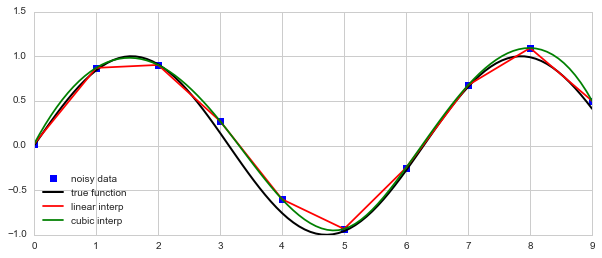

In [66]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests.

In [67]:
from scipy import stats

Discrete random variables:

In [68]:
X = stats.poisson(3.5)

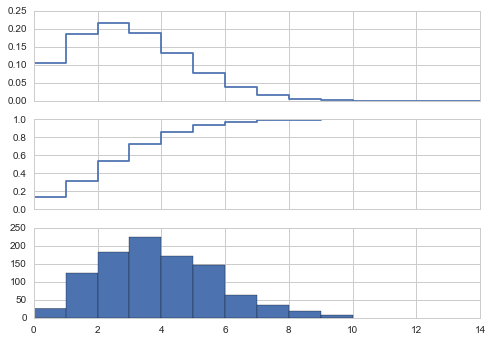

In [69]:
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

Continuous random variables:

In [70]:
Y = stats.norm()

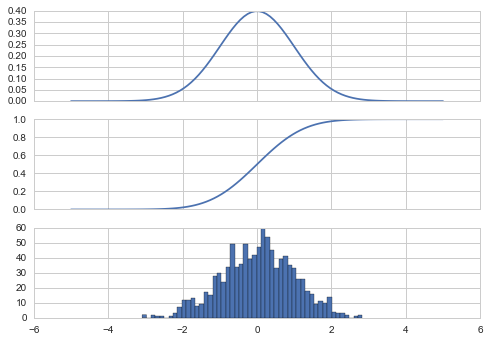

In [71]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

## References

[Scientific Python Lecture Notes](http://scipy-lectures.github.io)

[Official SciPy Tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/index.html)